In [23]:
import numpy as np 
import pandas as pd
import json

import tweepy
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



with open('/kaggle/input/twitter_credentials.json') as f:
    creds = json.load(f)
        
auth = tweepy.OAuthHandler(creds['consumer_key'],creds['consumer_secret'])
auth.set_access_token(creds['access_token'],creds['access_token_secret'])
api = tweepy.API(auth)

/kaggle/input/twitter_credentials.json


In [17]:
def remove_url(text):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())

# Create a custom search term and define the number of tweets
search_term = "#data -filter:retweets"

tweet_block = tweepy.Cursor(api.search,q=search_term,lang="en",since='2019-09-25').items(1000)
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweet_block]

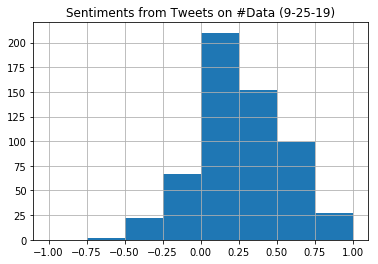

In [24]:
tweet = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in tweet]

tweet_df = pd.DataFrame(sentiment_values, columns=["Polarity","Tweet"])
tweet_df = tweet_df[tweet_df.Polarity != 0]
tweet_df.hist(bins=[-1.00,-0.75,-0.50,-0.25,0,0.25,0.50,0.75,1.00])
plt.title("Sentiments from Tweets on #Data" + " (9-25-19)")
plt.show()